In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline

In [2]:
%%time
data=pd.read_csv('applications data.csv')
data.shape

CPU times: user 603 ms, sys: 42.1 ms, total: 645 ms
Wall time: 650 ms


(1000000, 10)

In [3]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [4]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  int64 
 1   date         1000000 non-null  int64 
 2   ssn          1000000 non-null  int64 
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  int64 
 7   dob          1000000 non-null  int64 
 8   homephone    1000000 non-null  int64 
 9   fraud_label  1000000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 76.3+ MB


# Data Preparation

## No exclusions, no imputation, no outliers for this data set

## Clean the fields that have "frivolous" field values

In [6]:
data['ssn'] = data['ssn'].astype(str)
data['zip5'] = data['zip5'].astype(str)
data['homephone'] = data['homephone'].astype(str)

### ssn: 999999999 looks like it's a frivolous value. Replace it with something that won't link

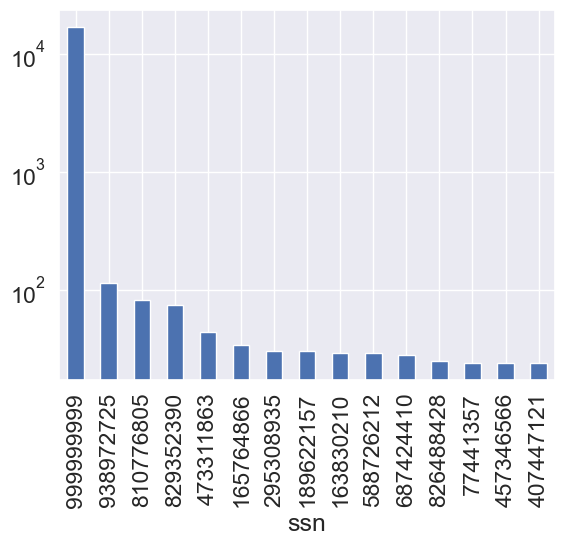

In [7]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [8]:
# The record number is a convenient value to put instead of a frivolous SSN. It won't link to other records.
data.loc[data['ssn'] == '999999999', 'ssn'] = data['record']

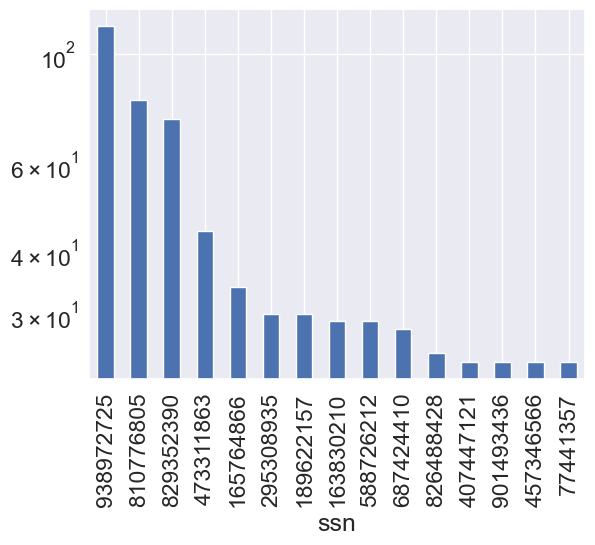

In [9]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

### Address: Let's look for any "dummy" addresses, that is, filled in by a dummy value when they were missing.

<AxesSubplot: xlabel='address'>

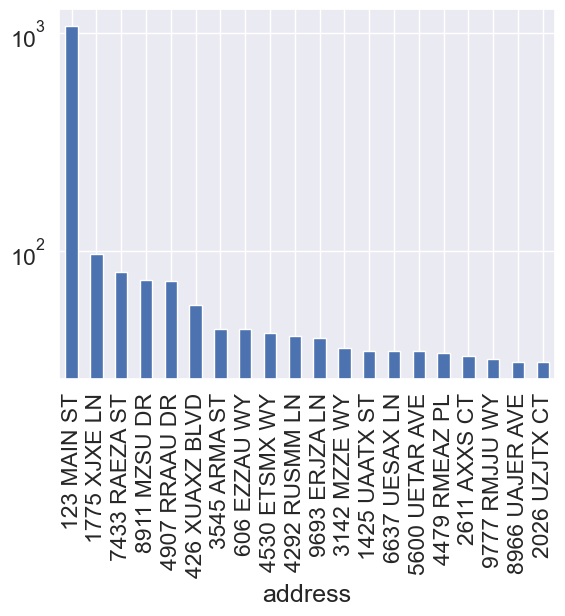

In [10]:
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

<AxesSubplot: xlabel='zip5'>

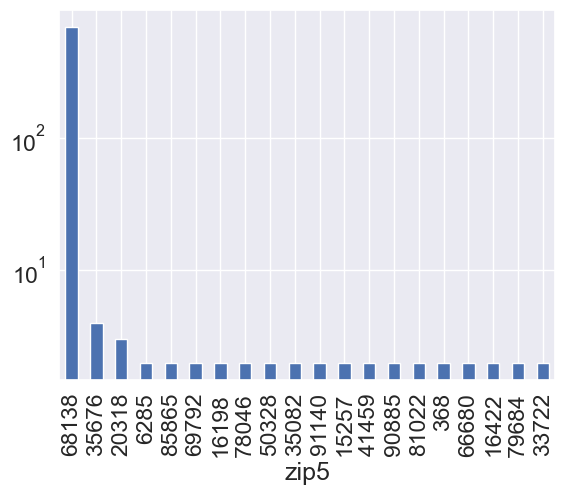

In [11]:
temp = data[data['address'] == '123 MAIN ST']
idx1 = temp.index
temp['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

<AxesSubplot: xlabel='fulladdress'>

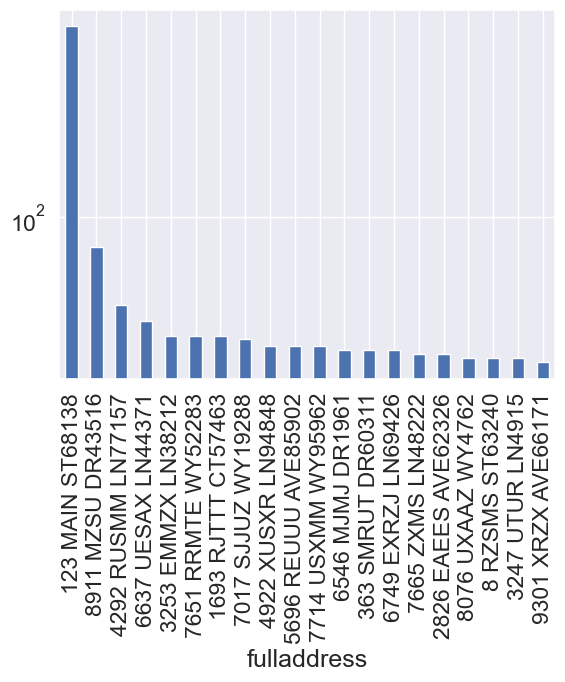

In [12]:
# Let's make a complete address including zip code
data['fulladdress']=data.address+data.zip5
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [13]:
# It looks like zip5 = 68138 is unusually high so is likely a dummy value. 
# Best guess is that 123 MAIN ST 68138 is a dummy adress. Let's replace with record number
data.loc[data['fulladdress'] == '123 MAIN ST68138', 'address'] = data['record']
data.loc[data['fulladdress'] == '123 MAIN ST68138', 'zip5'] = data['record']
data.loc[data['fulladdress'] == '123 MAIN ST68138', 'fulladdress'] = data['record']

<AxesSubplot: xlabel='address'>

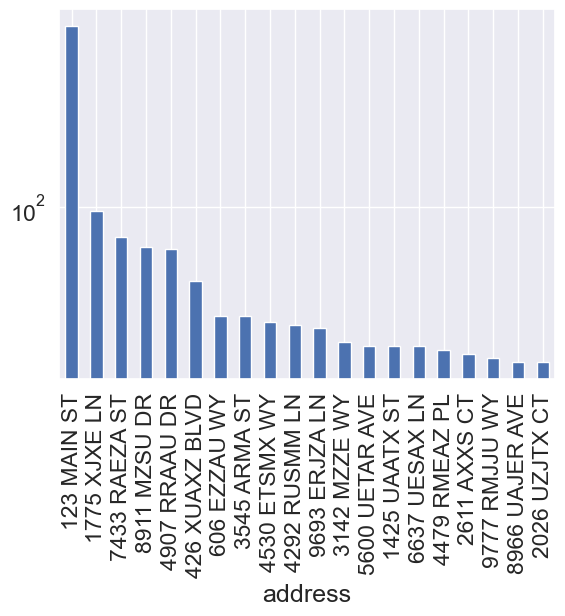

In [14]:
# This looks a little more natural now
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

<AxesSubplot: xlabel='zip5'>

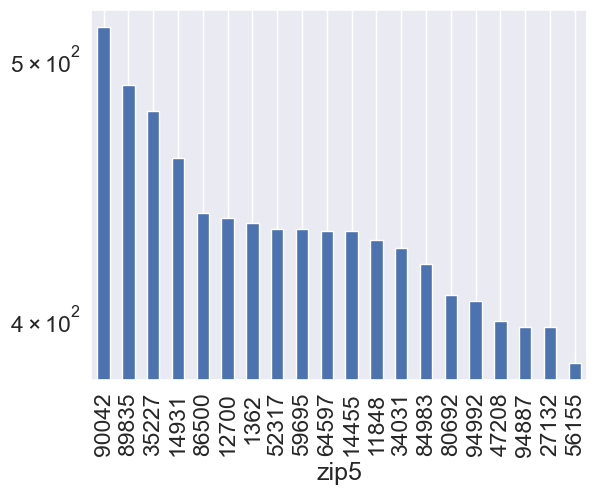

In [15]:
# This also looks fine now
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

### homephone: 9999999999 is a dummy value. Replace it with something that won't link. 

<AxesSubplot: xlabel='homephone'>

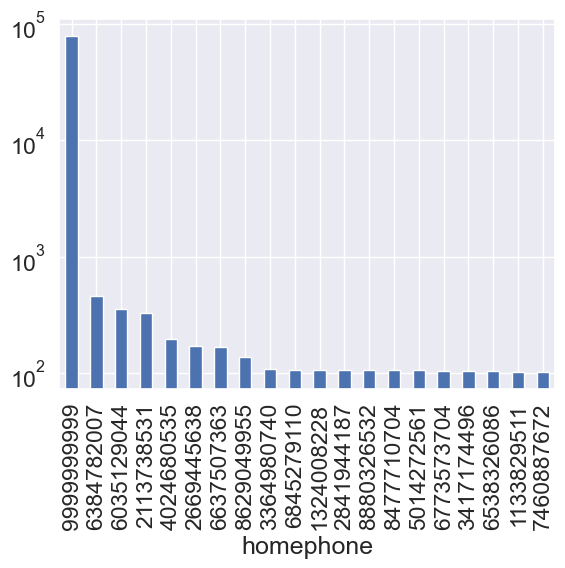

In [16]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [17]:
# Again, just replace these dummy values with anything that won't like
data.loc[data['homephone'] == '9999999999', 'homephone'] = data['record']

<AxesSubplot: xlabel='homephone'>

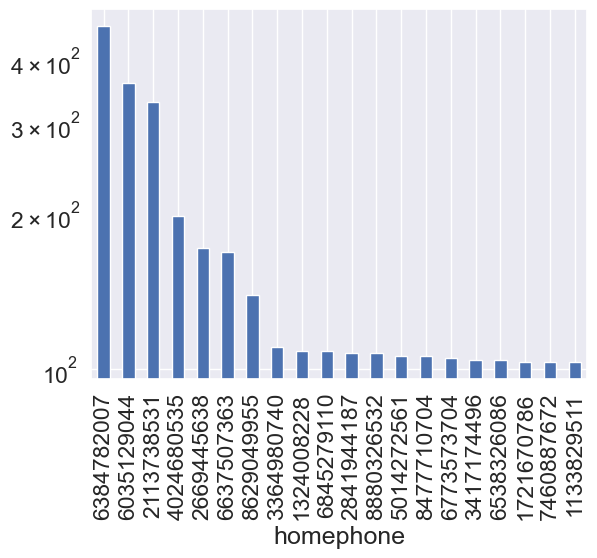

In [18]:
# This looks fine now.
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

### Convert the two datetime fields

In [19]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])
data['date'].head(10)

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
5   2017-01-01
6   2017-01-01
7   2017-01-01
8   2017-01-01
9   2017-01-01
Name: date, dtype: datetime64[ns]

In [20]:
data['dobyear'] = (data['dob'] / 10000).astype('int')
data['dobmonth'] = ((data['dob'] - data['dobyear'] * 10000) / 100).astype('int')
data['dobday'] = data['dob'] - data['dobyear'] * 10000 - data['dobmonth'] * 100
data['dob'] = pd.to_datetime(data.dobyear*10000+data.dobmonth*100+data.dobday,format='%Y%m%d')
data = data.drop(columns = ['dobyear','dobmonth','dobday'])
data['dob'].head(10)

0   1907-06-26
1   1934-06-15
2   1907-06-26
3   1944-04-30
4   1998-03-15
5   1948-06-13
6   1964-03-18
7   1919-05-28
8   1990-03-14
9   1975-01-27
Name: dob, dtype: datetime64[ns]

### dob: Looks like there's a dummy value of 06/26/1907 that occurs too frequently

<AxesSubplot: xlabel='dob'>

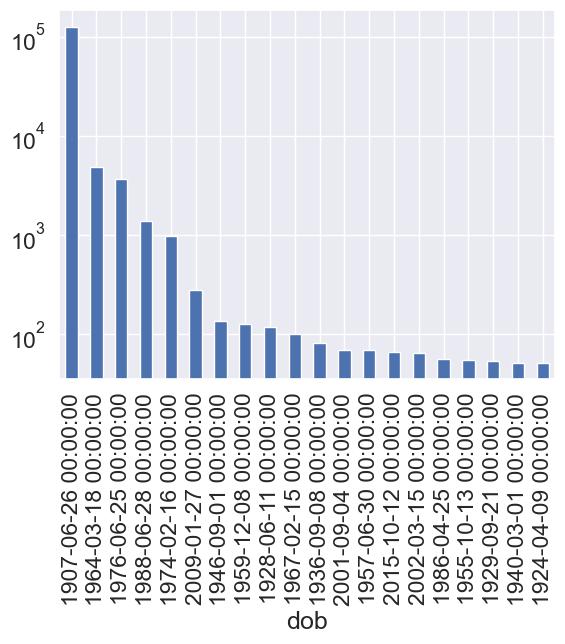

In [21]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [22]:
# Just put in a random dob for those with dob = 06/26/1907
temp = data[data['dob'] == dt.datetime.strptime('1907/06/26', '%Y/%m/%d')]
data.loc[data['dob'] == dt.datetime.strptime('1907/06/26', '%Y/%m/%d'), 'dob'] = \
    np.random.choice(pd.date_range('1930-01-01','1980-12-31'),len(temp))
idx1 = temp.index
data.iloc[idx1].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1978-01-14,1797504115,0,6861 EUTST PL2765
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1965-11-03,216537580,0,5581 RSREX LN56721
29,30,2017-01-01,811559368,RATZJTJJX,ETASRZEE,1815 EJZJR BLVD,2214,1974-07-20,2498035994,0,1815 EJZJR BLVD2214
43,44,2017-01-01,762588465,EUTZAMXMJ,RSUMSTXZ,5743 XUXXZ WY,16000,1938-01-14,5824618051,0,5743 XUXXZ WY16000
61,62,2017-01-01,984346966,XESXEEUUX,MZEJEXX,9693 ZXZE CT,87454,1935-10-20,4000850966,0,9693 ZXZE CT87454
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1940-11-05,65,0,6393 UEJEA LN41640
65,66,2017-01-01,992806709,EMSXUZAUX,ESJRSEJT,579 RAUTX PL,5341,1963-10-22,4623315287,0,579 RAUTX PL5341
69,70,2017-01-01,583514574,RAAXTATER,RXEUSTX,7304 RSERM PL,67066,1975-07-27,5325160132,0,7304 RSERM PL67066
70,71,2017-01-01,929838655,XXJAAMUAR,RMESXJZE,8056 XZUUA BLVD,69123,1952-04-19,3006676764,0,8056 XZUUA BLVD69123
110,111,2017-01-01,871279320,SSERMUXET,URJUUMXM,6520 EAATA PL,85525,1933-11-09,128470919,0,6520 EAATA PL85525


### That's it for these dummy field values that would have caused inappropriate linking

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  datetime64[ns]
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  int64         
 10  fulladdress  1000000 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 83.9+ MB


In [24]:
data.head(5).transpose()

,0,1,2,3,4
record,1,2,3,4,5
date,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
ssn,379070012,387482503,200332444,747451317,24065868
firstname,XRRAMMTR,MAMSTUJR,SZMMUJEZS,SJJZSXRSZ,SSSXUEJMS
lastname,SMJETJMJ,RTTEMRRR,EUSEZRAE,ETJXTXXS,SSUUJXUZ
address,6861 EUTST PL,7280 URASA PL,5581 RSREX LN,1387 UJZXJ RD,279 EAASA WY
zip5,2765,57169,56721,35286,3173
dob,1978-01-14 00:00:00,1934-06-15 00:00:00,1965-11-03 00:00:00,1944-04-30 00:00:00,1998-03-15 00:00:00
homephone,1797504115,4164239415,216537580,132144161,6101082272
fraud_label,0,1,0,0,0


In [25]:
data.tail(5).transpose()

,999995,999996,999997,999998,999999
record,999996,999997,999998,999999,1000000
date,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00
ssn,766104848,445178058,25283410,361232148,40027083
firstname,XUSAAURMZ,SAAJJEMTX,ESRXXRSUX,XXMZSRXMA,RXZXSMEZA
lastname,EJXXEXZX,UMAUETJX,EUEJRJJE,RSRSUJSS,UTEAAZXU
address,8079 EJRUJ AVE,4817 UMSXT AVE,7562 RJMAZ ST,3408 UZZAM WY,112 UTTJT PL
zip5,54890,74683,86805,49183,39491
dob,1955-04-18 00:00:00,1915-06-24 00:00:00,1988-06-28 00:00:00,2012-03-02 00:00:00,1982-08-26 00:00:00
homephone,8236558223,6790134432,3997657622,5935293731,5869926905
fraud_label,0,0,0,0,0


In [26]:
data['age_when_apply']=data['date'].dt.year-data['dob'].dt.year

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   record          1000000 non-null  int64         
 1   date            1000000 non-null  datetime64[ns]
 2   ssn             1000000 non-null  object        
 3   firstname       1000000 non-null  object        
 4   lastname        1000000 non-null  object        
 5   address         1000000 non-null  object        
 6   zip5            1000000 non-null  object        
 7   dob             1000000 non-null  datetime64[ns]
 8   homephone       1000000 non-null  object        
 9   fraud_label     1000000 non-null  int64         
 10  fulladdress     1000000 non-null  object        
 11  age_when_apply  1000000 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(7)
memory usage: 87.7+ MB


In [28]:
#Day of Week Target Encoding
data['dow']=data.date.apply(lambda x: calendar.day_name[x.weekday()])

In [29]:
# Separate the OOT
train_set=data[data.date<'2017-11-01']

In [30]:
#Statistical Smoothing
c=4;nmid=20;y_avg=train_set['fraud_label'].mean()
y_dow=train_set.groupby('dow')['fraud_label'].mean()
num=train_set.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

In [31]:
# delete files that we don't need any more to free up memory
del train_set

In [32]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

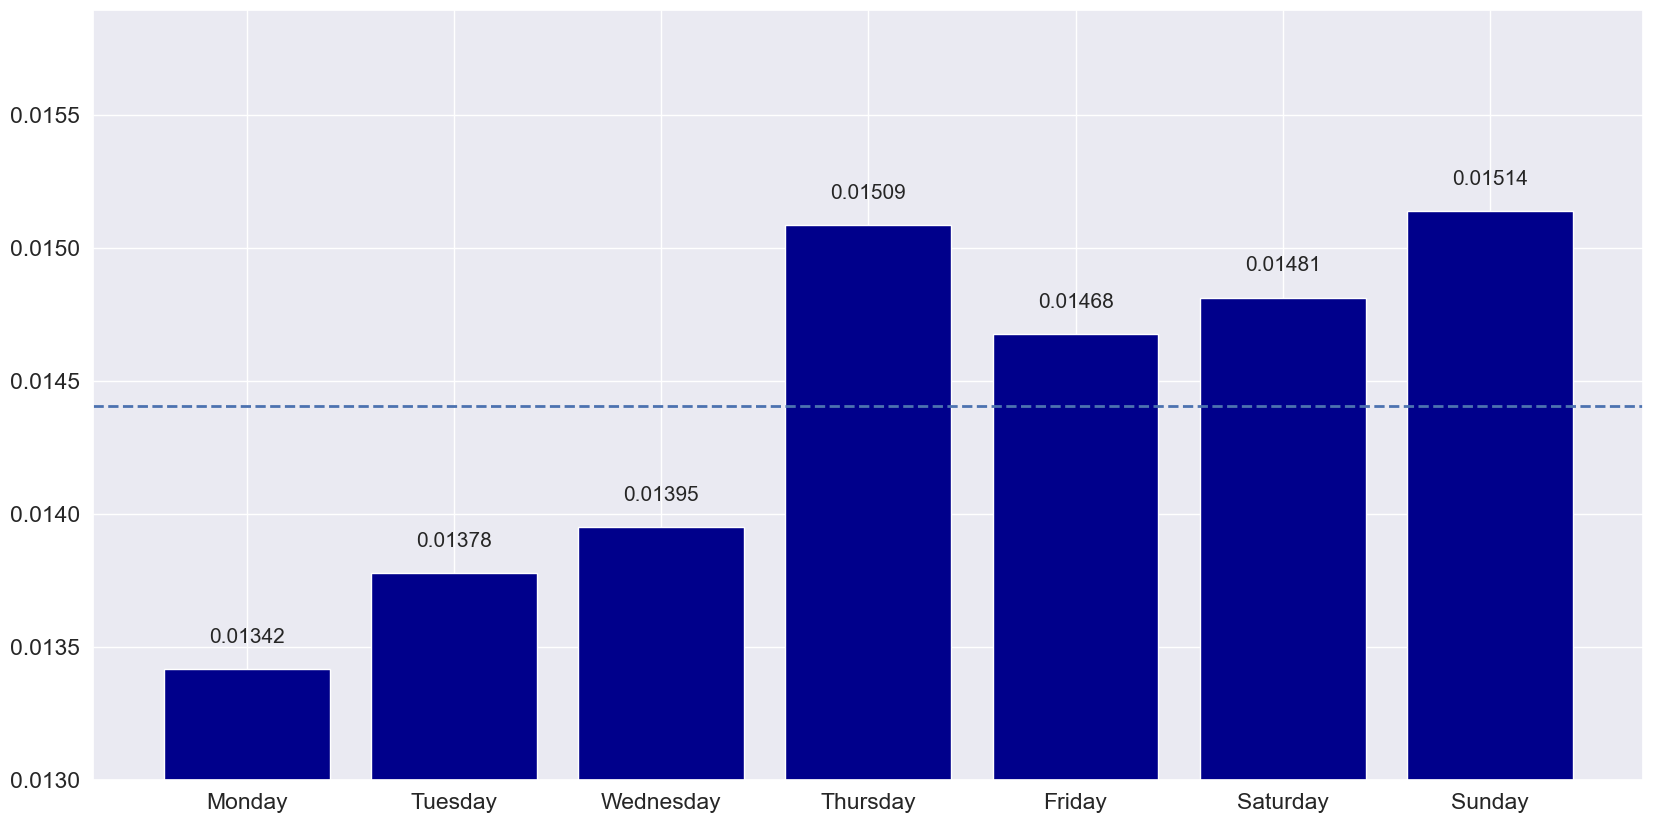

In [33]:
#plot
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='fraud_label',color='darkblue')
ax.set_ylim(bottom=.013)
ax.axhline(y=y_avg,ls='--',lw=2)

for i in (y_dow.index):
    ax.text(i,y_dow.loc[i,'fraud_label']+0.0001,round(y_dow.loc[i,'fraud_label'],5),horizontalalignment='center',fontsize=15)


plt.savefig('risktable.png')
plt.show()

In [34]:
# put dob back to a string so we can use it for link groups
data['dob'] = data['dob'].astype(str)
data.dtypes

record                     int64
date              datetime64[ns]
ssn                       object
firstname                 object
lastname                  object
address                   object
zip5                      object
dob                       object
homephone                 object
fraud_label                int64
fulladdress               object
age_when_apply             int32
dow                       object
dow_risk                 float64
dtype: object

In [35]:
data.tail().transpose()

,999995,999996,999997,999998,999999
record,999996,999997,999998,999999,1000000
date,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00
ssn,766104848,445178058,25283410,361232148,40027083
firstname,XUSAAURMZ,SAAJJEMTX,ESRXXRSUX,XXMZSRXMA,RXZXSMEZA
lastname,EJXXEXZX,UMAUETJX,EUEJRJJE,RSRSUJSS,UTEAAZXU
address,8079 EJRUJ AVE,4817 UMSXT AVE,7562 RJMAZ ST,3408 UZZAM WY,112 UTTJT PL
zip5,54890,74683,86805,49183,39491
dob,1955-04-18,1915-06-24,1988-06-28,2012-03-02,1982-08-26
homephone,8236558223,6790134432,3997657622,5935293731,5869926905
fraud_label,0,0,0,0,0


In [36]:
data.isna().sum()

record            0
date              0
ssn               0
firstname         0
lastname          0
address           0
zip5              0
dob               0
homephone         0
fraud_label       0
fulladdress       0
age_when_apply    0
dow               0
dow_risk          0
dtype: int64

In [37]:
# Make new entities for variables
data['fulladdress'] = data['fulladdress'].astype(str)
data['homephone'] = data['homephone'].astype(str)
data['name']=data.firstname+data.lastname
data['name_dob']=data.name+data.dob
data['name_fulladdress']=data['name']+data['fulladdress']
data['dob_homephone']=data.dob+data.homephone
data['fulladdress_dob']=data.fulladdress+data.dob
data['fulladdress_homephone']=data.fulladdress+data['homephone']
data['dob_homephone']=data.dob+data.homephone
data['homephone_name_dob']=data.homephone+data.name_dob

In [38]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'fulladdress', 'age_when_apply',
       'dow', 'dow_risk', 'name', 'name_dob', 'name_fulladdress',
       'dob_homephone', 'fulladdress_dob', 'fulladdress_homephone',
       'homephone_name_dob'],
      dtype='object')

In [39]:
data.head().transpose()

,0,1,2,3,4
record,1,2,3,4,5
date,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
ssn,379070012,387482503,200332444,747451317,24065868
firstname,XRRAMMTR,MAMSTUJR,SZMMUJEZS,SJJZSXRSZ,SSSXUEJMS
lastname,SMJETJMJ,RTTEMRRR,EUSEZRAE,ETJXTXXS,SSUUJXUZ
address,6861 EUTST PL,7280 URASA PL,5581 RSREX LN,1387 UJZXJ RD,279 EAASA WY
zip5,2765,57169,56721,35286,3173
dob,1978-01-14,1934-06-15,1965-11-03,1944-04-30,1998-03-15
homephone,1797504115,4164239415,216537580,132144161,6101082272
fraud_label,0,1,0,0,0


In [40]:
for i in list(data.iloc[:,np.r_[3:9,14:17]]):
    data['ssn_'+i]=(data.ssn).astype(str)+(data[i]).astype(str)

In [41]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'fulladdress', 'age_when_apply',
       'dow', 'dow_risk', 'name', 'name_dob', 'name_fulladdress',
       'dob_homephone', 'fulladdress_dob', 'fulladdress_homephone',
       'homephone_name_dob', 'ssn_firstname', 'ssn_lastname', 'ssn_address',
       'ssn_zip5', 'ssn_dob', 'ssn_homephone', 'ssn_name', 'ssn_name_dob',
       'ssn_name_fulladdress'],
      dtype='object')

In [42]:
attributes=list(data.iloc[:,np.r_[2, 5, 6, 7, 8, 10, 13:30]].columns)
print(len(attributes))
attributes

23


['ssn',
 'address',
 'zip5',
 'dob',
 'homephone',
 'fulladdress',
 'dow_risk',
 'name',
 'name_dob',
 'name_fulladdress',
 'dob_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'homephone_name_dob',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_name',
 'ssn_name_dob',
 'ssn_name_fulladdress']

In [43]:
%%time
# if the number in any attribute group is really low it won't be a good linking attribute
att_2_remove = []
for att in attributes:
    num = data[att].nunique()
    print(att, num)
    if num <= 10:
        print('remove',att)
        att_2_remove.append(att)
    else:
        print('ok',att)
        
# att_2_remove.append('dob')
# att_2_remove.append('zip5')
# att_2_remove.append('name')
att_2_remove

ssn 852753
ok ssn
address 829462
ok address
zip5 27058
ok zip5
dob 42672
ok dob
homephone 106755
ok homephone
fulladdress 845753
ok fulladdress
dow_risk 7
remove dow_risk
name 717126
ok name
name_dob 868423
ok name_dob
name_fulladdress 858153
ok name_fulladdress
dob_homephone 873942
ok dob_homephone
fulladdress_dob 872416
ok fulladdress_dob
fulladdress_homephone 863213
ok fulladdress_homephone
homephone_name_dob 875769
ok homephone_name_dob
ssn_firstname 854260
ok ssn_firstname
ssn_lastname 854301
ok ssn_lastname
ssn_address 859390
ok ssn_address
ssn_zip5 859071
ok ssn_zip5
ssn_dob 869169
ok ssn_dob
ssn_homephone 866207
ok ssn_homephone
ssn_name 854717
ok ssn_name
ssn_name_dob 869708
ok ssn_name_dob
ssn_name_fulladdress 860004
ok ssn_name_fulladdress
CPU times: user 2.29 s, sys: 65.5 ms, total: 2.36 s
Wall time: 2.36 s


['dow_risk']

In [44]:
data.drop(columns=att_2_remove,inplace=True)
attributes = [i for i in attributes if i not in att_2_remove]
attributes

['ssn',
 'address',
 'zip5',
 'dob',
 'homephone',
 'fulladdress',
 'name',
 'name_dob',
 'name_fulladdress',
 'dob_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'homephone_name_dob',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_name',
 'ssn_name_dob',
 'ssn_name_fulladdress']

In [45]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
record,1000000.0,NaN,NaN,NaN,500000.5,1.0,250000.75,500000.5,750000.25,1000000.0,288675.278932
date,1000000,NaN,NaN,NaN,2017-07-01 19:54:34.588799744,2017-01-01 00:00:00,2017-04-02 00:00:00,2017-07-02 00:00:00,2017-10-01 00:00:00,2017-12-31 00:00:00,NaN
ssn,1000000,852753,938972725,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
firstname,1000000,78136,EAMSTRMT,12658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastname,1000000,177001,ERJSAXA,8580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,1000000,829462,123 MAIN ST,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip5,1000000,27058,90042,514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dob,1000000,42672,1964-03-18,4822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homephone,1000000,106755,6384782007,466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fraud_label,1000000.0,NaN,NaN,NaN,0.014393,0.0,0.0,0.0,0.0,1.0,0.119104


In [46]:
data.head(5).transpose()

,0,1,2,3,4
record,1,2,3,4,5
date,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
ssn,379070012,387482503,200332444,747451317,24065868
firstname,XRRAMMTR,MAMSTUJR,SZMMUJEZS,SJJZSXRSZ,SSSXUEJMS
lastname,SMJETJMJ,RTTEMRRR,EUSEZRAE,ETJXTXXS,SSUUJXUZ
address,6861 EUTST PL,7280 URASA PL,5581 RSREX LN,1387 UJZXJ RD,279 EAASA WY
zip5,2765,57169,56721,35286,3173
dob,1978-01-14,1934-06-15,1965-11-03,1944-04-30,1998-03-15
homephone,1797504115,4164239415,216537580,132144161,6101082272
fraud_label,0,1,0,0,0


# Creating Variables

In [47]:
df=data.copy()
vars=data.copy()
df['check_date']=df.date
df['check_record']=df.record
numvars = 1

In [48]:
icols = 0
for col in data.columns:
    print(icols, col)
    icols = icols+1

0 record
1 date
2 ssn
3 firstname
4 lastname
5 address
6 zip5
7 dob
8 homephone
9 fraud_label
10 fulladdress
11 age_when_apply
12 dow
13 name
14 name_dob
15 name_fulladdress
16 dob_homephone
17 fulladdress_dob
18 fulladdress_homephone
19 homephone_name_dob
20 ssn_firstname
21 ssn_lastname
22 ssn_address
23 ssn_zip5
24 ssn_dob
25 ssn_homephone
26 ssn_name
27 ssn_name_dob
28 ssn_name_fulladdress


In [49]:
data.tail().transpose()

,999995,999996,999997,999998,999999
record,999996,999997,999998,999999,1000000
date,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00
ssn,766104848,445178058,25283410,361232148,40027083
firstname,XUSAAURMZ,SAAJJEMTX,ESRXXRSUX,XXMZSRXMA,RXZXSMEZA
lastname,EJXXEXZX,UMAUETJX,EUEJRJJE,RSRSUJSS,UTEAAZXU
address,8079 EJRUJ AVE,4817 UMSXT AVE,7562 RJMAZ ST,3408 UZZAM WY,112 UTTJT PL
zip5,54890,74683,86805,49183,39491
dob,1955-04-18,1915-06-24,1988-06-28,2012-03-02,1982-08-26
homephone,8236558223,6790134432,3997657622,5935293731,5869926905
fraud_label,0,0,0,0,0


## Velocity/counts and days since

In [50]:
%%time
begin=time.time()
for i in attributes:
    st=time.time()
    df_1=df[['record','date',i]]
    df_r=df[['check_record','check_date',i]]
    temp=pd.merge(df_1,df_r,left_on=i,right_on=i)
    newvars = pd.DataFrame(vars['record'])
    
    #day since
    day_since_df=temp[temp.record>temp.check_record][['record','date','check_date']]\
    .groupby('record')[['date','check_date']].last()
    mapper=365 - (day_since_df.date-day_since_df.check_date).dt.days
    newvars[i+'_day_since']=vars.record.map(mapper)
#     print(f'\n{i}_day_since --->Done')
    
    #Velocity
    for v in [0,1,3,7,14,30]:
        count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(v)))
                          &(temp.record>=temp.check_record)]
        col_name=f'{i}_count_{v}'
        mapper2=count_day_df.groupby('record')[i].count()
        newvars[col_name]=vars.record.map(mapper2)
#         print(f'{i}_count_{str(v)} --->Done')
        
    vars = pd.merge(vars,newvars, on='record')
    print(f'Run time for entity {i}--------{time.time()-st:0.2f}s')

vars.fillna(0, inplace=True)
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Run time for entity ssn--------1.12s
Run time for entity address--------1.20s
Run time for entity zip5--------17.14s
Run time for entity dob--------9.76s
Run time for entity homephone--------6.90s
Run time for entity fulladdress--------1.30s
Run time for entity name--------1.41s
Run time for entity name_dob--------1.19s
Run time for entity name_fulladdress--------1.19s
Run time for entity dob_homephone--------1.20s
Run time for entity fulladdress_dob--------1.28s
Run time for entity fulladdress_homephone--------1.27s
Run time for entity homephone_name_dob--------1.24s
Run time for entity ssn_firstname--------1.27s
Run time for entity ssn_lastname--------1.27s
Run time for entity ssn_address--------1.27s
Run time for entity ssn_zip5--------1.30s
Run time for entity ssn_dob--------1.33s
Run time for entity ssn_homephone--------1.33s
Run time for entity ssn_name--------1.34s
Run time for entity ssn_name_dob--------1.38s
Run time for entity ssn_name_fulladdress--------1.37s
Total run time:

In [51]:
numvars_new = len(vars.columns)- icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 153   total variables: 154


In [52]:
%%time
# relative velocity
start=time.time()
for i in attributes:
    newvars = pd.DataFrame(vars['record'])
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            newvars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))

    vars = pd.merge(vars,newvars, on='record')    
print(f'Total run time:{time.time()-start:0.2f}s')

Total run time:10.74s
CPU times: user 5.69 s, sys: 5.05 s, total: 10.7 s
Wall time: 10.7 s


In [53]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 176   total variables: 330


## Counts by entities 

In [54]:
# import warnings
# warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [55]:
%%time
begin=time.time()
for i in attributes:
    newvars = pd.DataFrame(vars['record'])
    for v in attributes:
        st=time.time()
        if i==v:
            continue
        else:
            df_c=df[['record','date',i]]
            df_d=df[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
        
        #number of unique for particular field
        for t in[0,1,3,7,14,30]:
            count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(t)))
                          &(temp.record>=temp.check_record)]
            col_name=f'{i}_unique_count_for_{v}_{t}'
            mapper=count_day_df.groupby(['record'])[v].nunique()
            vars[col_name]=vars.record.map(mapper)
             
        print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
        
    vars = pd.merge(vars,newvars, on='record')      
    print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Run time for entity ssn in field address--------1.61s
Run time for entity ssn in field zip5--------1.23s
Run time for entity ssn in field dob--------1.18s
Run time for entity ssn in field homephone--------1.20s
Run time for entity ssn in field fulladdress--------1.59s
Run time for entity ssn in field name--------1.56s
Run time for entity ssn in field name_dob--------1.68s
Run time for entity ssn in field name_fulladdress--------1.79s
Run time for entity ssn in field dob_homephone--------1.59s
Run time for entity ssn in field fulladdress_dob--------1.70s
Run time for entity ssn in field fulladdress_homephone--------1.71s
Run time for entity ssn in field homephone_name_dob--------1.78s
Run time for entity ssn in field ssn_firstname--------1.57s
Run time for entity ssn in field ssn_lastname--------1.60s
Run time for entity ssn in field ssn_address--------1.79s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn in field ssn_zip5--------1.96s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_dob--------1.72s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_homephone--------1.68s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_name--------1.73s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_name_dob--------1.81s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn in field ssn_name_fulladdress--------1.89s
Total run time:0.63min
Run time for entity address in field ssn--------2.48s
Run time for entity address in field zip5--------1.36s
Run time for entity address in field dob--------1.24s
Run time for entity address in field homephone--------1.27s
Run time for entity address in field fulladdress--------1.66s
Run time for entity address in field name--------1.66s
Run time for entity address in field name_dob--------2.33s
Run time for entity address in field name_fulladdress--------2.64s
Run time for entity address in field dob_homephone--------2.29s
Run time for entity address in field fulladdress_dob--------2.30s
Run time for entity address in field fulladdress_homephone--------1.94s
Run time for entity address in field homephone_name_dob--------1.97s
Run time for entity address in field ssn_firstname--------1.73s
Run time for entity address in field ssn_lastname--------1.64s
Run time for entity address in field ssn_addre

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity address in field ssn_zip5--------1.59s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_dob--------1.72s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_homephone--------1.70s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_name--------1.74s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_name_dob--------1.84s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity address in field ssn_name_fulladdress--------1.93s
Total run time:1.35min
Run time for entity zip5 in field ssn--------22.67s
Run time for entity zip5 in field address--------25.06s
Run time for entity zip5 in field dob--------26.10s
Run time for entity zip5 in field homephone--------25.13s
Run time for entity zip5 in field fulladdress--------25.08s
Run time for entity zip5 in field name--------23.89s
Run time for entity zip5 in field name_dob--------23.94s
Run time for entity zip5 in field name_fulladdress--------24.46s
Run time for entity zip5 in field dob_homephone--------24.05s
Run time for entity zip5 in field fulladdress_dob--------24.90s
Run time for entity zip5 in field fulladdress_homephone--------24.17s
Run time for entity zip5 in field homephone_name_dob--------25.65s
Run time for entity zip5 in field ssn_firstname--------23.86s
Run time for entity zip5 in field ssn_lastname--------23.70s
Run time for entity zip5 in field ssn_address--------23.98s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity zip5 in field ssn_zip5--------23.50s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn_dob--------23.79s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn_homephone--------23.66s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn_name--------24.09s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn_name_dob--------25.52s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity zip5 in field ssn_name_fulladdress--------27.44s
Total run time:10.04min
Run time for entity dob in field ssn--------11.63s
Run time for entity dob in field address--------11.03s
Run time for entity dob in field zip5--------10.54s
Run time for entity dob in field homephone--------10.45s
Run time for entity dob in field fulladdress--------11.14s
Run time for entity dob in field name--------10.90s
Run time for entity dob in field name_dob--------11.21s
Run time for entity dob in field name_fulladdress--------11.44s
Run time for entity dob in field dob_homephone--------11.00s
Run time for entity dob in field fulladdress_dob--------11.18s
Run time for entity dob in field fulladdress_homephone--------11.28s
Run time for entity dob in field homephone_name_dob--------11.71s
Run time for entity dob in field ssn_firstname--------11.37s
Run time for entity dob in field ssn_lastname--------10.84s
Run time for entity dob in field ssn_address--------11.09s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity dob in field ssn_zip5--------10.58s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn_dob--------10.91s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn_homephone--------10.75s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn_name--------11.12s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn_name_dob--------11.14s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob in field ssn_name_fulladdress--------11.34s
Total run time:14.03min
Run time for entity homephone in field ssn--------9.14s
Run time for entity homephone in field address--------9.02s
Run time for entity homephone in field zip5--------8.38s
Run time for entity homephone in field dob--------8.23s
Run time for entity homephone in field fulladdress--------8.89s
Run time for entity homephone in field name--------8.80s
Run time for entity homephone in field name_dob--------9.01s
Run time for entity homephone in field name_fulladdress--------9.37s
Run time for entity homephone in field dob_homephone--------9.01s
Run time for entity homephone in field fulladdress_dob--------9.23s
Run time for entity homephone in field fulladdress_homephone--------8.99s
Run time for entity homephone in field homephone_name_dob--------9.22s
Run time for entity homephone in field ssn_firstname--------8.94s
Run time for entity homephone in field ssn_lastname--------8.85s
Run time for entit

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity homephone in field ssn_zip5--------8.70s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn_dob--------9.04s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn_homephone--------8.93s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn_name--------9.12s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn_name_dob--------9.33s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone in field ssn_name_fulladdress--------9.43s
Total run time:17.33min
Run time for entity fulladdress in field ssn--------2.12s
Run time for entity fulladdress in field address--------1.64s
Run time for entity fulladdress in field zip5--------1.24s
Run time for entity fulladdress in field dob--------1.21s
Run time for entity fulladdress in field homephone--------1.21s
Run time for entity fulladdress in field name--------1.59s
Run time for entity fulladdress in field name_dob--------1.69s
Run time for entity fulladdress in field name_fulladdress--------1.79s
Run time for entity fulladdress in field dob_homephone--------1.60s
Run time for entity fulladdress in field fulladdress_dob--------1.76s
Run time for entity fulladdress in field fulladdress_homephone--------1.77s
Run time for entity fulladdress in field homephone_name_dob--------1.81s
Run time for entity fulladdress in field ssn_firstname--------1.59s
Run time for entity fulladdress in field ssn_lastname-

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity fulladdress in field ssn_zip5--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn_dob--------1.63s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn_homephone--------1.60s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn_name--------1.68s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn_name_dob--------1.86s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress in field ssn_name_fulladdress--------1.89s
Total run time:18.10min
Run time for entity name in field ssn--------1.90s
Run time for entity name in field address--------1.86s
Run time for entity name in field zip5--------1.48s
Run time for entity name in field dob--------1.42s
Run time for entity name in field homephone--------1.43s
Run time for entity name in field fulladdress--------1.85s
Run time for entity name in field name_dob--------1.93s
Run time for entity name in field name_fulladdress--------2.04s
Run time for entity name in field dob_homephone--------1.83s
Run time for entity name in field fulladdress_dob--------1.97s
Run time for entity name in field fulladdress_homephone--------1.96s
Run time for entity name in field homephone_name_dob--------2.05s
Run time for entity name in field ssn_firstname--------1.86s
Run time for entity name in field ssn_lastname--------1.88s
Run time for entity name in field ssn_address--------1.88s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity name in field ssn_zip5--------1.77s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn_dob--------1.83s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn_homephone--------1.85s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn_name--------2.05s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn_name_dob--------2.05s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name in field ssn_name_fulladdress--------2.13s
Total run time:18.99min
Run time for entity name_dob in field ssn--------1.74s
Run time for entity name_dob in field address--------1.61s
Run time for entity name_dob in field zip5--------1.23s
Run time for entity name_dob in field dob--------1.16s
Run time for entity name_dob in field homephone--------1.19s
Run time for entity name_dob in field fulladdress--------1.58s
Run time for entity name_dob in field name--------1.55s
Run time for entity name_dob in field name_fulladdress--------1.81s
Run time for entity name_dob in field dob_homephone--------1.55s
Run time for entity name_dob in field fulladdress_dob--------1.69s
Run time for entity name_dob in field fulladdress_homephone--------1.66s
Run time for entity name_dob in field homephone_name_dob--------1.76s
Run time for entity name_dob in field ssn_firstname--------1.57s
Run time for entity name_dob in field ssn_lastname--------1.55s
Run time for entity name_dob in

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity name_dob in field ssn_zip5--------1.50s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn_dob--------1.60s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn_homephone--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn_name--------1.66s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn_name_dob--------1.75s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_dob in field ssn_name_fulladdress--------1.85s
Total run time:19.84min
Run time for entity name_fulladdress in field ssn--------1.65s
Run time for entity name_fulladdress in field address--------1.60s
Run time for entity name_fulladdress in field zip5--------1.22s
Run time for entity name_fulladdress in field dob--------1.16s
Run time for entity name_fulladdress in field homephone--------1.19s
Run time for entity name_fulladdress in field fulladdress--------1.58s
Run time for entity name_fulladdress in field name--------1.54s
Run time for entity name_fulladdress in field name_dob--------1.69s
Run time for entity name_fulladdress in field dob_homephone--------1.56s
Run time for entity name_fulladdress in field fulladdress_dob--------1.68s
Run time for entity name_fulladdress in field fulladdress_homephone--------1.69s
Run time for entity name_fulladdress in field homephone_name_dob--------1.78s
Run time for entity name_fulladdress in field ssn_firstname--------1

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity name_fulladdress in field ssn_zip5--------1.50s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn_dob--------1.57s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn_homephone--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn_name--------1.66s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn_name_dob--------1.80s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity name_fulladdress in field ssn_name_fulladdress--------1.87s
Total run time:20.75min
Run time for entity dob_homephone in field ssn--------1.70s
Run time for entity dob_homephone in field address--------1.69s
Run time for entity dob_homephone in field zip5--------1.20s
Run time for entity dob_homephone in field dob--------1.15s
Run time for entity dob_homephone in field homephone--------1.17s
Run time for entity dob_homephone in field fulladdress--------1.63s
Run time for entity dob_homephone in field name--------1.51s
Run time for entity dob_homephone in field name_dob--------1.65s
Run time for entity dob_homephone in field name_fulladdress--------1.78s
Run time for entity dob_homephone in field fulladdress_dob--------1.69s
Run time for entity dob_homephone in field fulladdress_homephone--------1.66s
Run time for entity dob_homephone in field homephone_name_dob--------1.75s
Run time for entity dob_homephone in field ssn_firstname--------1.53s
Run time for entity dob

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity dob_homephone in field ssn_zip5--------1.49s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn_dob--------1.55s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn_homephone--------1.54s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn_name--------1.65s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn_name_dob--------1.75s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity dob_homephone in field ssn_name_fulladdress--------1.84s
Total run time:21.69min
Run time for entity fulladdress_dob in field ssn--------1.66s
Run time for entity fulladdress_dob in field address--------1.60s
Run time for entity fulladdress_dob in field zip5--------1.21s
Run time for entity fulladdress_dob in field dob--------1.14s
Run time for entity fulladdress_dob in field homephone--------1.14s
Run time for entity fulladdress_dob in field fulladdress--------1.65s
Run time for entity fulladdress_dob in field name--------1.70s
Run time for entity fulladdress_dob in field name_dob--------1.76s
Run time for entity fulladdress_dob in field name_fulladdress--------1.77s
Run time for entity fulladdress_dob in field dob_homephone--------1.58s
Run time for entity fulladdress_dob in field fulladdress_homephone--------1.66s
Run time for entity fulladdress_dob in field homephone_name_dob--------1.76s
Run time for entity fulladdress_dob in field ssn_firstname--------1.54s
Ru

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity fulladdress_dob in field ssn_zip5--------1.51s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn_dob--------1.54s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn_homephone--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn_name--------1.62s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn_name_dob--------1.77s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_dob in field ssn_name_fulladdress--------1.85s
Total run time:22.66min
Run time for entity fulladdress_homephone in field ssn--------1.63s
Run time for entity fulladdress_homephone in field address--------1.59s
Run time for entity fulladdress_homephone in field zip5--------1.21s
Run time for entity fulladdress_homephone in field dob--------1.15s
Run time for entity fulladdress_homephone in field homephone--------1.16s
Run time for entity fulladdress_homephone in field fulladdress--------1.55s
Run time for entity fulladdress_homephone in field name--------1.53s
Run time for entity fulladdress_homephone in field name_dob--------1.65s
Run time for entity fulladdress_homephone in field name_fulladdress--------1.83s
Run time for entity fulladdress_homephone in field dob_homephone--------1.69s
Run time for entity fulladdress_homephone in field fulladdress_dob--------1.71s
Run time for entity fulladdress_homephone in field homephone_name_dob--------1.79s
Run ti

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity fulladdress_homephone in field ssn_zip5--------1.49s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn_dob--------1.54s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn_homephone--------1.58s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn_name--------1.68s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn_name_dob--------1.75s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity fulladdress_homephone in field ssn_name_fulladdress--------1.86s
Total run time:23.69min
Run time for entity homephone_name_dob in field ssn--------1.62s
Run time for entity homephone_name_dob in field address--------1.60s
Run time for entity homephone_name_dob in field zip5--------1.20s
Run time for entity homephone_name_dob in field dob--------1.17s
Run time for entity homephone_name_dob in field homephone--------1.19s
Run time for entity homephone_name_dob in field fulladdress--------1.56s
Run time for entity homephone_name_dob in field name--------1.57s
Run time for entity homephone_name_dob in field name_dob--------1.75s
Run time for entity homephone_name_dob in field name_fulladdress--------1.76s
Run time for entity homephone_name_dob in field dob_homephone--------1.64s
Run time for entity homephone_name_dob in field fulladdress_dob--------1.79s
Run time for entity homephone_name_dob in field fulladdress_homephone--------1.70s
Run time for entity homephone_nam

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity homephone_name_dob in field ssn_zip5--------1.48s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn_dob--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn_homephone--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn_name--------1.64s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn_name_dob--------1.74s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity homephone_name_dob in field ssn_name_fulladdress--------1.83s
Total run time:24.77min
Run time for entity ssn_firstname in field ssn--------1.64s
Run time for entity ssn_firstname in field address--------1.61s
Run time for entity ssn_firstname in field zip5--------1.23s
Run time for entity ssn_firstname in field dob--------1.18s
Run time for entity ssn_firstname in field homephone--------1.18s
Run time for entity ssn_firstname in field fulladdress--------1.59s
Run time for entity ssn_firstname in field name--------1.56s
Run time for entity ssn_firstname in field name_dob--------1.69s
Run time for entity ssn_firstname in field name_fulladdress--------1.77s
Run time for entity ssn_firstname in field dob_homephone--------1.66s
Run time for entity ssn_firstname in field fulladdress_dob--------1.72s
Run time for entity ssn_firstname in field fulladdress_homephone--------1.68s
Run time for entity ssn_firstname in field homephone_name_dob--------1.78s
Run time for entity s

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_firstname in field ssn_zip5--------1.50s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_firstname in field ssn_dob--------1.60s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_firstname in field ssn_homephone--------1.57s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_firstname in field ssn_name--------1.67s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_firstname in field ssn_name_dob--------1.80s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_firstname in field ssn_name_fulladdress--------1.86s
Total run time:25.90min
Run time for entity ssn_lastname in field ssn--------1.63s
Run time for entity ssn_lastname in field address--------1.61s
Run time for entity ssn_lastname in field zip5--------1.24s
Run time for entity ssn_lastname in field dob--------1.16s
Run time for entity ssn_lastname in field homephone--------1.19s
Run time for entity ssn_lastname in field fulladdress--------1.59s
Run time for entity ssn_lastname in field name--------1.67s
Run time for entity ssn_lastname in field name_dob--------1.75s
Run time for entity ssn_lastname in field name_fulladdress--------1.77s
Run time for entity ssn_lastname in field dob_homephone--------1.60s
Run time for entity ssn_lastname in field fulladdress_dob--------1.67s
Run time for entity ssn_lastname in field fulladdress_homephone--------1.67s
Run time for entity ssn_lastname in field homephone_name_dob--------1.78s
Run time for entity ssn_lastname in fie

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_lastname in field ssn_zip5--------1.51s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_lastname in field ssn_dob--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_lastname in field ssn_homephone--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_lastname in field ssn_name--------1.65s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_lastname in field ssn_name_dob--------1.77s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_lastname in field ssn_name_fulladdress--------1.85s
Total run time:27.02min
Run time for entity ssn_address in field ssn--------1.62s
Run time for entity ssn_address in field address--------1.60s
Run time for entity ssn_address in field zip5--------1.20s
Run time for entity ssn_address in field dob--------1.17s
Run time for entity ssn_address in field homephone--------1.24s
Run time for entity ssn_address in field fulladdress--------1.59s
Run time for entity ssn_address in field name--------1.53s
Run time for entity ssn_address in field name_dob--------1.64s
Run time for entity ssn_address in field name_fulladdress--------1.74s
Run time for entity ssn_address in field dob_homephone--------1.55s
Run time for entity ssn_address in field fulladdress_dob--------1.66s
Run time for entity ssn_address in field fulladdress_homephone--------1.66s
Run time for entity ssn_address in field homephone_name_dob--------1.75s
Run time for entity ssn_address in field ssn_firstnam

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_address in field ssn_zip5--------1.49s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_address in field ssn_dob--------1.55s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_address in field ssn_homephone--------1.54s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_address in field ssn_name--------1.63s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_address in field ssn_name_dob--------1.76s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_address in field ssn_name_fulladdress--------1.82s
Total run time:28.19min
Run time for entity ssn_zip5 in field ssn--------1.67s
Run time for entity ssn_zip5 in field address--------1.57s
Run time for entity ssn_zip5 in field zip5--------1.18s
Run time for entity ssn_zip5 in field dob--------1.13s
Run time for entity ssn_zip5 in field homephone--------1.14s
Run time for entity ssn_zip5 in field fulladdress--------1.54s
Run time for entity ssn_zip5 in field name--------1.50s
Run time for entity ssn_zip5 in field name_dob--------1.63s
Run time for entity ssn_zip5 in field name_fulladdress--------1.72s
Run time for entity ssn_zip5 in field dob_homephone--------1.54s
Run time for entity ssn_zip5 in field fulladdress_dob--------1.65s
Run time for entity ssn_zip5 in field fulladdress_homephone--------1.64s
Run time for entity ssn_zip5 in field homephone_name_dob--------1.85s
Run time for entity ssn_zip5 in field ssn_firstname--------1.54s
Run time for entity ssn_zip5

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_zip5 in field ssn_address--------1.58s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_zip5 in field ssn_dob--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_zip5 in field ssn_homephone--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_zip5 in field ssn_name--------1.62s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_zip5 in field ssn_name_dob--------1.72s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_zip5 in field ssn_name_fulladdress--------1.83s
Total run time:29.36min
Run time for entity ssn_dob in field ssn--------1.62s
Run time for entity ssn_dob in field address--------1.61s
Run time for entity ssn_dob in field zip5--------1.21s
Run time for entity ssn_dob in field dob--------1.16s
Run time for entity ssn_dob in field homephone--------1.18s
Run time for entity ssn_dob in field fulladdress--------1.55s
Run time for entity ssn_dob in field name--------1.53s
Run time for entity ssn_dob in field name_dob--------1.64s
Run time for entity ssn_dob in field name_fulladdress--------1.77s
Run time for entity ssn_dob in field dob_homephone--------1.54s
Run time for entity ssn_dob in field fulladdress_dob--------1.67s
Run time for entity ssn_dob in field fulladdress_homephone--------1.65s
Run time for entity ssn_dob in field homephone_name_dob--------1.76s
Run time for entity ssn_dob in field ssn_firstname--------1.56s
Run time for entity ssn_dob in field ssn_last

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_dob in field ssn_address--------1.60s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_dob in field ssn_zip5--------1.50s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_dob in field ssn_homephone--------1.55s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_dob in field ssn_name--------1.64s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_dob in field ssn_name_dob--------1.75s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_dob in field ssn_name_fulladdress--------1.83s
Total run time:30.59min
Run time for entity ssn_homephone in field ssn--------1.61s
Run time for entity ssn_homephone in field address--------1.58s
Run time for entity ssn_homephone in field zip5--------1.19s
Run time for entity ssn_homephone in field dob--------1.14s
Run time for entity ssn_homephone in field homephone--------1.15s
Run time for entity ssn_homephone in field fulladdress--------1.56s
Run time for entity ssn_homephone in field name--------1.52s
Run time for entity ssn_homephone in field name_dob--------1.62s
Run time for entity ssn_homephone in field name_fulladdress--------1.72s
Run time for entity ssn_homephone in field dob_homephone--------1.54s
Run time for entity ssn_homephone in field fulladdress_dob--------1.64s
Run time for entity ssn_homephone in field fulladdress_homephone--------1.73s
Run time for entity ssn_homephone in field homephone_name_dob--------1.74s
Run time for entity ssn_homephon

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_homephone in field ssn_address--------1.58s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_homephone in field ssn_zip5--------1.51s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_homephone in field ssn_dob--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_homephone in field ssn_name--------1.63s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_homephone in field ssn_name_dob--------1.73s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_homephone in field ssn_name_fulladdress--------1.83s
Total run time:31.85min
Run time for entity ssn_name in field ssn--------1.73s
Run time for entity ssn_name in field address--------1.60s
Run time for entity ssn_name in field zip5--------1.21s
Run time for entity ssn_name in field dob--------1.17s
Run time for entity ssn_name in field homephone--------1.18s
Run time for entity ssn_name in field fulladdress--------1.58s
Run time for entity ssn_name in field name--------1.56s
Run time for entity ssn_name in field name_dob--------1.66s
Run time for entity ssn_name in field name_fulladdress--------1.77s
Run time for entity ssn_name in field dob_homephone--------1.57s
Run time for entity ssn_name in field fulladdress_dob--------1.69s
Run time for entity ssn_name in field fulladdress_homephone--------1.69s
Run time for entity ssn_name in field homephone_name_dob--------1.79s
Run time for entity ssn_name in field ssn_firstname--------1.56s
Run time for entity ssn_na

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_name in field ssn_address--------1.62s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name in field ssn_zip5--------1.53s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name in field ssn_dob--------1.56s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name in field ssn_homephone--------1.57s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name in field ssn_name_dob--------1.80s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name in field ssn_name_fulladdress--------1.85s
Total run time:33.14min
Run time for entity ssn_name_dob in field ssn--------1.79s
Run time for entity ssn_name_dob in field address--------1.65s
Run time for entity ssn_name_dob in field zip5--------1.26s
Run time for entity ssn_name_dob in field dob--------1.17s
Run time for entity ssn_name_dob in field homephone--------1.19s
Run time for entity ssn_name_dob in field fulladdress--------1.60s
Run time for entity ssn_name_dob in field name--------1.57s
Run time for entity ssn_name_dob in field name_dob--------1.70s
Run time for entity ssn_name_dob in field name_fulladdress--------1.81s
Run time for entity ssn_name_dob in field dob_homephone--------1.59s
Run time for entity ssn_name_dob in field fulladdress_dob--------1.69s
Run time for entity ssn_name_dob in field fulladdress_homephone--------1.71s
Run time for entity ssn_name_dob in field homephone_name_dob--------1.85s
Run time for entity ssn_name_dob in field ss

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_name_dob in field ssn_address--------1.63s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_dob in field ssn_zip5--------1.54s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_dob in field ssn_dob--------1.58s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_dob in field ssn_homephone--------1.59s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_dob in field ssn_name--------1.69s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_dob in field ssn_name_fulladdress--------1.89s
Total run time:34.38min
Run time for entity ssn_name_fulladdress in field ssn--------1.95s
Run time for entity ssn_name_fulladdress in field address--------1.64s
Run time for entity ssn_name_fulladdress in field zip5--------1.25s
Run time for entity ssn_name_fulladdress in field dob--------1.19s
Run time for entity ssn_name_fulladdress in field homephone--------1.19s
Run time for entity ssn_name_fulladdress in field fulladdress--------1.68s
Run time for entity ssn_name_fulladdress in field name--------1.60s
Run time for entity ssn_name_fulladdress in field name_dob--------1.67s
Run time for entity ssn_name_fulladdress in field name_fulladdress--------1.75s
Run time for entity ssn_name_fulladdress in field dob_homephone--------1.57s
Run time for entity ssn_name_fulladdress in field fulladdress_dob--------1.69s
Run time for entity ssn_name_fulladdress in field fulladdress_homephone--------1.71s
Run time for entit

<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Run time for entity ssn_name_fulladdress in field ssn_address--------1.60s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_fulladdress in field ssn_zip5--------1.55s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_fulladdress in field ssn_dob--------1.59s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_fulladdress in field ssn_homephone--------1.59s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_fulladdress in field ssn_name--------1.69s


<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Run time for entity ssn_name_fulladdress in field ssn_name_dob--------1.79s
Total run time:35.66min
CPU times: user 24min 8s, sys: 7min 41s, total: 31min 49s
Wall time: 35min 39s


In [56]:
del df

In [57]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 2772   total variables: 3102


In [58]:
print('time to here: ',dt.datetime.now() - start_time)

time to here:  0:37:09.652615


## Maximum Indicator

In [59]:
# Maximum Indicator
begin=time.time()
for i in attributes:
    print(i)
    for v in ['1','3','7','30']:
        st=time.time()
        mapper=vars.groupby(i)[i+'_count_'+v].max()
        vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)
        print(f'max_count_by_{i}_{v} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

ssn
max_count_by_ssn_1 --->Done
max_count_by_ssn_3 --->Done
max_count_by_ssn_7 --->Done
max_count_by_ssn_30 --->Done
Run time for entity ssn--------1.0266928672790527s
address
max_count_by_address_1 --->Done
max_count_by_address_3 --->Done
max_count_by_address_7 --->Done
max_count_by_address_30 --->Done
Run time for entity address--------0.9896297454833984s
zip5
max_count_by_zip5_1 --->Done
max_count_by_zip5_3 --->Done
max_count_by_zip5_7 --->Done
max_count_by_zip5_30 --->Done
Run time for entity zip5--------0.08862614631652832s
dob
max_count_by_dob_1 --->Done
max_count_by_dob_3 --->Done
max_count_by_dob_7 --->Done
max_count_by_dob_30 --->Done
Run time for entity dob--------0.09107303619384766s
homephone
max_count_by_homephone_1 --->Done
max_count_by_homephone_3 --->Done
max_count_by_homephone_7 --->Done
max_count_by_homephone_30 --->Done
Run time for entity homephone--------0.11547112464904785s
fulladdress
max_count_by_fulladdress_1 --->Done
max_count_by_fulladdress_3 --->Done
max_cou

In [60]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 88   total variables: 3190


## Age Indicator

In [61]:
# Age Indicator
begin=time.time()
for i in attributes:
    st=time.time()
    mapper_max=vars.groupby(i)['age_when_apply'].max()
    mapper_mean=vars.groupby(i)['age_when_apply'].mean()
    mapper_min=vars.groupby(i)['age_when_apply'].min()
    vars['max_age_by_'+i]=vars[i].map(mapper_max)
    vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
    vars['min_age_by_'+i]=vars[i].map(mapper_min)
    print(f'age_by_{i} --->Done')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

age_by_ssn --->Done
age_by_address --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['min_age_by_'+i]=vars[i].map(mapper_min)


age_by_zip5 --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_homephone --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_fulladdress --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_name --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_name_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_name_fulladdress --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_dob_homephone --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_fulladdress_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_fulladdress_homephone --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_homephone_name_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_firstname --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_lastname --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_address --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_zip5 --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_homephone --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_name --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

age_by_ssn_name_dob --->Done


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['max_age_by_'+i]=vars[i].map(mapper_max)
/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['mean_age_by_'+i]=vars[i].map(mapper_mean)


age_by_ssn_name_fulladdress --->Done
Total run time:0.81min


/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_1053/391347787.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vars['min_age_by_'+i]=vars[i].map(mapper_min)


In [62]:
del data

In [63]:
vars.shape

(1000000, 3285)

In [64]:
%%time
# try to improve the fragmentation
vars = vars._consolidate()
vars = vars.copy()

CPU times: user 5.48 s, sys: 21.3 s, total: 26.8 s
Wall time: 41.9 s


In [65]:
numvars_new = len(vars.columns) - icols - numvars
numvars = len(vars.columns) - icols
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 66   total variables: 3256


In [66]:
# vars.columns.to_list()
# print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

In [67]:
vars.shape

(1000000, 3285)

In [68]:
print('duration: ',dt.datetime.now() - start_time)

duration:  0:39:46.317246


In [69]:
vars.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob,max_age_by_ssn_name_fulladdress,mean_age_by_ssn_name_fulladdress,min_age_by_ssn_name_fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1978-01-14,1797504115,0,...,39,39,39.0,39,39,39.0,39,39,39.0,39
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1965-11-03,216537580,0,...,52,52,52.0,52,52,52.0,52,52,52.0,52
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0,...,19,19,19.0,19,19,19.0,19,19,19.0,19


In [70]:
%%time
vars.drop(columns=attributes,inplace=True)
vars.head()

CPU times: user 1.7 s, sys: 6.34 s, total: 8.05 s
Wall time: 12.3 s


,record,date,firstname,lastname,fraud_label,age_when_apply,dow,ssn_day_since,ssn_count_0,ssn_count_1,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob,max_age_by_ssn_name_fulladdress,mean_age_by_ssn_name_fulladdress,min_age_by_ssn_name_fulladdress
0,1,2017-01-01,XRRAMMTR,SMJETJMJ,0,39,Sunday,0.0,1,1,...,39,39,39.0,39,39,39.0,39,39,39.0,39
1,2,2017-01-01,MAMSTUJR,RTTEMRRR,1,83,Sunday,0.0,1,1,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,2017-01-01,SZMMUJEZS,EUSEZRAE,0,52,Sunday,0.0,1,1,...,52,52,52.0,52,52,52.0,52,52,52.0,52
3,4,2017-01-01,SJJZSXRSZ,ETJXTXXS,0,73,Sunday,0.0,1,1,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,2017-01-01,SSSXUEJMS,SSUUJXUZ,0,19,Sunday,0.0,1,1,...,19,19,19.0,19,19,19.0,19,19,19.0,19


### find the record number for the out-of-time validation data

You'll need these record numbers in your modeling code. Get them here since I remove Date from the data file.

In [71]:
temp = vars[vars['date']>='2017-11-01']
ind1 = len(vars)-len(temp)
print(vars[ind1-3:ind1+3]['date'])
# final['id1'] = final.index
# id1 = final.loc[indoot]['id1']
temp.reset_index(inplace=True)

833504   2017-10-31
833505   2017-10-31
833506   2017-10-31
833507   2017-11-01
833508   2017-11-01
833509   2017-11-01
Name: date, dtype: datetime64[ns]


In [72]:
temp.head()

,index,record,date,firstname,lastname,fraud_label,age_when_apply,dow,ssn_day_since,ssn_count_0,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob,max_age_by_ssn_name_fulladdress,mean_age_by_ssn_name_fulladdress,min_age_by_ssn_name_fulladdress
0,833507,833508,2017-11-01,SUSTJTMXU,UESTMJES,0,37,Wednesday,241.0,1,...,37,37,37.0,37,37,37.0,37,37,37.0,37
1,833508,833509,2017-11-01,REXAXJEUR,STSSESZ,0,84,Wednesday,0.0,1,...,84,84,84.0,84,84,84.0,84,84,84.0,84
2,833509,833510,2017-11-01,RTMMTSZRZ,STZRUXZM,0,89,Wednesday,356.0,1,...,89,89,89.0,89,89,89.0,89,89,89.0,89
3,833510,833511,2017-11-01,XJEEMMJTJ,USTTRXEZ,0,75,Wednesday,0.0,1,...,75,75,75.0,75,75,75.0,75,75,75.0,75
4,833511,833512,2017-11-01,MEERZUXXU,SMUMSERX,0,11,Wednesday,0.0,1,...,11,11,11.0,11,11,11.0,11,11,11.0,11


In [73]:
indoot = temp.loc[0]['record']
print(indoot)

833508


In [74]:
temp = vars[vars['date']>='2017-01-15']
ind2 = len(vars)-len(temp)
print(vars[ind2-3:ind2+3]['date'])
# final['id1'] = final.index
# id1 = final.loc[indoot]['id1']
temp.reset_index(inplace=True)

38508   2017-01-14
38509   2017-01-14
38510   2017-01-14
38511   2017-01-15
38512   2017-01-15
38513   2017-01-15
Name: date, dtype: datetime64[ns]


In [75]:
temp.head()

,index,record,date,firstname,lastname,fraud_label,age_when_apply,dow,ssn_day_since,ssn_count_0,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob,max_age_by_ssn_name_fulladdress,mean_age_by_ssn_name_fulladdress,min_age_by_ssn_name_fulladdress
0,38511,38512,2017-01-15,RASTAZMM,EEJTAXEZ,0,60,Sunday,0.0,1,...,60,60,60.0,60,60,60.0,60,60,60.0,60
1,38512,38513,2017-01-15,ESXAURS,SMJZXZMZ,0,32,Sunday,0.0,1,...,32,32,32.0,32,32,32.0,32,32,32.0,32
2,38513,38514,2017-01-15,XMAEAEXSX,RTZRTZAS,0,99,Sunday,0.0,1,...,99,99,99.0,99,99,99.0,99,99,99.0,99
3,38514,38515,2017-01-15,UUTXTTUAE,EMUTUJS,0,64,Sunday,0.0,1,...,64,64,64.0,64,64,64.0,64,64,64.0,64
4,38515,38516,2017-01-15,RTMMTSZRZ,SZJMSMUJ,0,90,Sunday,0.0,1,...,90,90,90.0,90,90,90.0,90,90,90.0,90


In [76]:
ind2w = temp.loc[0]['record']
print(ind2w)

38512


In [77]:
print('Recnum to exclude first 2 weeks:',ind2w)
print('Recnum to exclude oot for feature selection:', indoot)

Recnum to exclude first 2 weeks: 38512
Recnum to exclude oot for feature selection: 833508


In [78]:
%%time
vars.drop(columns=['date','firstname','lastname','dow'],inplace=True)
vars.head()

CPU times: user 1.37 s, sys: 5.48 s, total: 6.84 s
Wall time: 14 s


,record,fraud_label,age_when_apply,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob,max_age_by_ssn_name_fulladdress,mean_age_by_ssn_name_fulladdress,min_age_by_ssn_name_fulladdress
0,1,0,39,0.0,1,1,1,1,1,1,...,39,39,39.0,39,39,39.0,39,39,39.0,39
1,2,1,83,0.0,1,1,1,1,1,1,...,83,83,83.0,83,83,83.0,83,83,83.0,83
2,3,0,52,0.0,1,1,1,1,1,1,...,52,52,52.0,52,52,52.0,52,52,52.0,52
3,4,0,73,0.0,1,1,1,1,1,1,...,73,73,73.0,73,73,73.0,73,73,73.0,73
4,5,0,19,0.0,1,1,1,1,1,1,...,19,19,19.0,19,19,19.0,19,19,19.0,19


In [79]:
vars.shape

(1000000, 3259)

In [80]:
print('time to here:', dt.datetime.now() - start_time)

time to here: 0:40:30.956703


In [81]:
%%time
vars.to_csv('vars.csv',index=False)

CPU times: user 5min 39s, sys: 9.54 s, total: 5min 49s
Wall time: 5min 53s


In [ ]:
%%time
# remove any duplicate variables
# Note - if this cell causes the kernel to die, then it's likely requiring too much memory.
# In that case just write out the data that has duplicate columns and run this cell in a standalone notebook.
# vars.to_csv('vars_before dedup.csv',index=False)
print(vars.shape)
vars = vars.T.drop_duplicates().T
vars.shape

(1000000, 3259)


### Check that all fields are numeric

In [ ]:
vars.isna().sum().sum()

In [ ]:
# We want this nan check to return False
vars.isnull().any().any()

In [ ]:
# We want True if all are numeric
vars.shape[1] == vars.select_dtypes(include=np.number).shape[1]

In [ ]:
# We want this list to be empty
non_numeric_columns = vars.select_dtypes(exclude=['number',np.number]).columns
print("Non-numeric columns: ", non_numeric_columns)

In [ ]:
%%time
vars.to_csv('vars.csv',index=False)

In [ ]:
print('duration: ',dt.datetime.now() - start_time)
# takes about an hour on my new laptop.
# takes about 2.5 hours on my old laptop.

In [ ]:
!pwd